# Portuguese IMDB Reviews

Data taken from Hugging Face Maritaca AI [Portuguese IMDB Reviews](https://huggingface.co/datasets/maritaca-ai/imdb_pt).

### Import Libraries

In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import textwrap

from datasets import load_dataset

### Load IMDB Reviews Dataset

In [96]:
dataset_train, dataset_test = load_dataset('maritaca-ai/imdb_pt', split=['train', 'test'])

Found cached dataset imdb_pt (/Users/idocarmo/.cache/huggingface/datasets/maritaca-ai___imdb_pt/plain_text/1.0.0/ffeeea85dfdf69a15638f37cdae931de451276b0fbc70c92f7cad159b96abb05)
100%|██████████| 2/2 [00:00<00:00, 295.59it/s]


Split train data in train and validation sets

In [97]:
dataset_train, dataset_validation = dataset_train.train_test_split(0.2, seed=0).values()

Loading cached split indices for dataset at /Users/idocarmo/.cache/huggingface/datasets/maritaca-ai___imdb_pt/plain_text/1.0.0/ffeeea85dfdf69a15638f37cdae931de451276b0fbc70c92f7cad159b96abb05/cache-b0a5c7dba16e123e.arrow and /Users/idocarmo/.cache/huggingface/datasets/maritaca-ai___imdb_pt/plain_text/1.0.0/ffeeea85dfdf69a15638f37cdae931de451276b0fbc70c92f7cad159b96abb05/cache-a02b26a26fb632e1.arrow


#### Review Example

In [98]:
print(textwrap.fill(dataset_train["text"][100], 80))

Não me interpretem mal - eu amo David como Poirot. Eu amo a série e os filmes,
mas o suficiente já é: morte no Nilo. Todo mundo fez este!Sabemos quem morre.
Nós sabemos por que eles morrem. Sabemos quem é o assassino. Sabemos como foi
feito. Então eu já digo o suficiente!O Sr. Suchet poderia ter usado esse talento
incrível em outro dos romances de Agatha Christie. Eu direi que a atuação de
todos os atores foi excelente. Os cenários eram fantásticos e muito realistas.
Eu gostei especialmente de David Soul, mas fiquei surpreso com a aparência
'horrível'. Espero que ele não pareça assim na vida 'real'!Sinceramente, não me
lembro de outros filmes se o fim era o mesmo. De alguma forma, acho que não. Eu
pensei que era um toque bastante brilhante se a Sra. Christie escreveu dessa
maneira. Eu preferiria ter esse final então desperdiçando na prisão!


### Target Balance

Train

In [99]:
np.mean(dataset_train["label"])

0.5003

Validation

In [100]:
np.mean(dataset_validation["label"])

0.4988

Test

In [101]:
np.mean(dataset_test["label"])

0.5

### Estimate Number of Tokens

In [102]:
def estimate_tokens(example):
    example["n_tokens"] = len(example["text"].split())
    return example

In [103]:
dataset_train = dataset_train.map(estimate_tokens)
dataset_validation = dataset_validation.map(estimate_tokens)
dataset_test = dataset_test.map(estimate_tokens)

Loading cached processed dataset at /Users/idocarmo/.cache/huggingface/datasets/maritaca-ai___imdb_pt/plain_text/1.0.0/ffeeea85dfdf69a15638f37cdae931de451276b0fbc70c92f7cad159b96abb05/cache-df3285a38d9000d5.arrow


In [104]:
names = ["train", "validation", "test"]
data_sets = [
    dataset_train["n_tokens"], 
    dataset_validation["n_tokens"], 
    dataset_test["n_tokens"]
]
print("TOKENS")
for name, data in zip(names, data_sets):
    mu = np.mean(data)
    s = np.std(data, ddof=1)
    print(name)
    print("mean: {0:<6.0f} std: {1:<6.0f}\n".format(mu, s))

TOKENS
train
mean: 219    std: 167   

validation
mean: 214    std: 159   

test
mean: 214    std: 159   



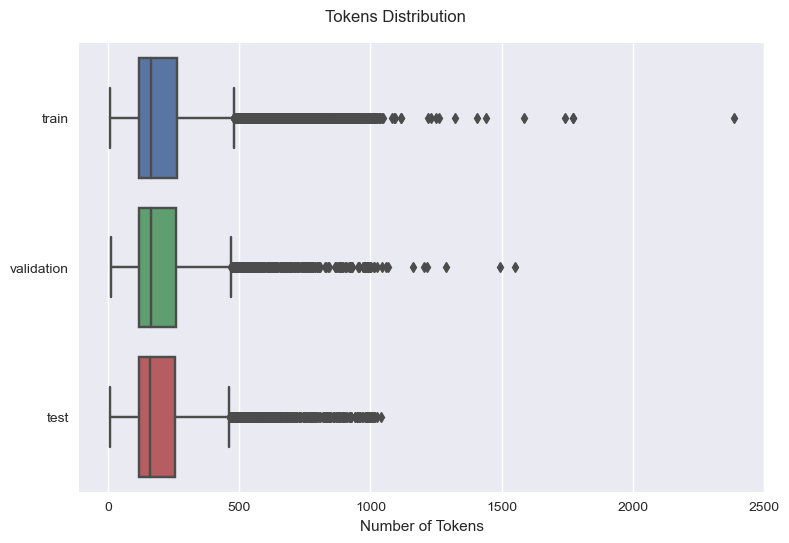

In [105]:
fig, ax = plt.subplots()

fig.suptitle("Tokens Distribution")

sns.boxplot(
    data = data_sets,
    orient = 'h',
    ax = ax
)

ax.set_yticks([0, 1, 2], names)
ax.set_xlabel("Number of Tokens")

fig.tight_layout()
plt.show()


In [111]:
df = pd.DataFrame(data_sets, index=['train', 'validation', 'test']).T
df.describe()

,train,validation,test
count,20000.000000,5000.000000,5000.000000
mean,219.274450,214.369000,213.716400
std,166.986404,158.968676,158.722606
min,8.000000,11.000000,10.000000
25%,119.000000,119.000000,118.000000
50%,164.000000,163.000000,162.000000
75%,264.000000,259.000000,256.000000
max,2384.000000,1551.000000,1041.000000
